# CME538 - Introduction to Data Science
## Assignment 9 - Unsupervised Learning

### Learning Objectives
After completing this assignment, you should be comfortable:

- Using Principal Component Analysis
- Using k-means clustering

### Marking Breakdown

Question | Points
--- | ---
Question 1a | 1
Question 1b | 1
Question 1c | 1
Question 2a | 1
Question 2b | 1
Question 2c | 1
Question 2d | 1
Question 2e | 1
Question 2f | 1
Question 2g | 1
Question 2h | 1
Question 2i | 1
Question 2j | 3
Total | 15

One of the following marks below will be added to the **Total** above.

### Code Quality

| Rank | Points | Description |
| :-- | :-- | :-- |
| Youngling | 1 | Code is unorganized, variables names are not descriptive, redundant, memory-intensive, computationally-intensive, uncommented, error-prone, difficult to understand. |
| Padawan | 2 | Code is organized, variables names are descriptive, satisfactory utilization of memory and computational resources, satisfactory commenting, readable. |
| Jedi | 3 | Code is organized, easy to understand, efficient, clean, a pleasure to read. #cleancode |

## Setup Notebook

In [ ]:
# Import 3rd party libraries
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

# 1. PCA on 3D Data
Let's import `data_3d.csv`. We have named the DataFrame surfboard because the data resembles a surfboard when plotted in 3D space.

In [ ]:
surfboard = pd.read_csv('data_3d.csv')
surfboard.head(5)

The cell below will allow you to view the data as a 3D scatterplot. Rotate the data around and zoom in and out using your trackpad or the controls at the top right of the figure.

You should see that the data is an ellipsoid that looks roughly like a `surfboard` or a hashbrown patty. That is, it is pretty long in one direction, pretty wide in another direction, and relatively thin along its third dimension. We can think of these as the "length", "width", and "thickness" of the `surfboard` data.

Observe that the `surfboard` is not aligned with the `x/y/z` axes.

To give the figure a little more visual pop we assigned a pre-determined color value (that we've arbitrarily chosen) to each point. These colors do not mean anything important, they're simply there as a visual aid.

In [ ]:
def colorize_surfboard_data(df):
    colors = pd.read_csv("surfboard_colors.csv", header = None).values
    df_copy = df.copy()
    df_copy.insert(loc = 3, column = "color", value = colors)
    return df_copy
    
fig = px.scatter_3d(colorize_surfboard_data(surfboard), x='x', y='y', z='z', range_x = [-10, 10], range_y = [-10, 10], range_z = [-10, 10], color = "color", color_continuous_scale = 'RdBu')
fig.show()

## Question 1a
Now that we've understood the data, let's work on understanding what PCA will do when applied to this data.

To properly perform PCA, we will first need to "center" the data so that the mean of each feature is 0.

Compute the columnwise mean of `surfboard` in the cell below, and store the result in `surfboard_mean`. You can choose to make `surfboard_mean` a numpy array or a series, whichever is more convenient for you. Regardless of what data type you use, `surfboard_mean` should have 3 means, 1 for each attribute, with the `x` coordinate first, then `y`, then `z`.

Then, subtract `surfboard_mean` from `surfboard`, and save the result in `surfboard_centered`. The order of the columns in `surfboard_centered` should be x, then y, then z.

In [ ]:
# Write your code here
surfboard_mean = ...
surfboard_centered = ...

## Question 1b
Using the Principal Component funtionality in `Scikit-Learn`, initialize a `PCA` object and assign it to a variable called `pca`. Next, fit the `PCA` model using the `surfboard_centered` DataFrame. You should be computing as many principal compnents as you have features in `surfboard_centered`, which is 3.

In [ ]:
# Write your code here
pca = ...

## Question 1c
Lastly, you must use the Principal Components you just computed to transform `surfboard_centered` into the new Principal Components coordinate space. The transformed DataFrame should be assigned to the variable `surfboard_pcs`. The column names should be as follows: `pc1, pc2, and pc3`. Your DataFrame should look something like this.
<br>
<img src="images/q1c.png" alt="drawing" width="300"/>
<br> 

In [ ]:
# Write your code here
surfboard_pcs = ...

# View DataFrame
surfboard_pcs.head()

Transforming the original data to Principal Component space is simply a rotation of the data such that the data will now appear "axis aligned". Specifically, for a 3d dataset, if we plot `PC1`, `PC2`, and `PC3` along the `x`, `y`, and `z` axes of our plot, then the greatest amount of variation happens along the `x-axis`, the second greatest amount along the `y-axis`, and the smallest amount along the `z-axis`.

To visualize this, run the cell below, which will show our data now projected onto the principal component space. Compare with your original figure, and observe that the data is exactly the same, only it is now rotated.

In [ ]:
fig = px.scatter_3d(colorize_surfboard_data(surfboard_pcs), 
                    x='pc1', y='pc2', z='pc3', range_x = [-10, 10], range_y = [-10, 10], range_z = [-10, 10], color = 'color', color_continuous_scale = 'RdBu');
fig.show();

We can also create a 2D scatterplot of our surfboard data as well. Note that the resulting is just the 3D plot as viewed from directly "overhead".

In [ ]:
ax = sns.scatterplot(data = colorize_surfboard_data(surfboard_pcs), x = 'pc1', y = 'pc2', hue = "color", palette = "RdBu", legend = False)
ax.set_xlim(-10, 10);
ax.set_ylim(-10, 10);

# 2. Fremont Bridge Bike Traffic
The data we will use here are the hourly bicycle counts on Seattle's Fremont Bridge. These data come from an automated bicycle counter, installed in late 2012, which has inductive sensors under the sidewalks on either side of the bridge.

First, let's import the ride count dataset.

In [ ]:
bike_data = pd.read_csv('fremont_bridge_bicycle_counter.csv', 
                        index_col='datetime', parse_dates=True)
bike_data.head()

Let's do some quick data cleaning and set any missing values to zero.

In [ ]:
bike_data = bike_data.fillna(0)

## Question 2a
Next, let's plot the number of weekly rides for both direction for the entire duration of the dataset. You're plot should look something like this.

<br>
<img src="images/q2a.png" alt="drawing" width="600"/>
<br> 

In [ ]:
# Write your code here
...

## Question 2b
Describe what you see in this plot in terms of trend, seasonality, and cyclicity.

*Type your answer here, replacing this text.*

From here, we could do a variety of other visualizations based on our intuition about what might affect bicycle counts. For example, we could look at the effect of the days of the week, the effect of the weather, the effect of COVID and other factors that we explored previously in Assignment 4. But we could also proceed by letting the dataset speak for itself, and use unsupervised machine learning techniques to learn what the data have to tell us.

## Question 2c
For this, we will consider each day in the dataset as its own separate entity (sample/row/record). For each day, we have 48 observations: two observations (east and west directions) for each of the 24 hours in a day. By examining the days in light of these observations and doing some careful analysis, we should be able to extract meaningful quantitative statements from the data themselves, without the need to lean on any other assumptions. Assumptions such as: The day of the week impacts ridership or if its hot out, well people will be riding their bikes.

The first step in this approach is to transform our data. We want DataFrame, where each row corresponds to a day, and each column corresponds to one of the 48 observations. The DataFrame index should be a Datetime object. We can arrange the data this way using the `pivot_table()` function in `Pandas`. Your output should look something like this.

<br>
<img src="images/q2c.png" alt="drawing" width="700"/>
<br> 

In [ ]:
# Write your code here
bike_data_features = ...

# View DataFrame
bike_data_features.head()

When displaying the shape of `bike_data_features` we should get `(3376, 48)`

In [ ]:
bike_data_features.shape

The next thing we'll do is compute the Principal Components of `bike_data_features` and transform the data.

## Question 2d
Using the Principal Component funtionality in `Scikit-Learn`, initialize a `PCA` object and assign it to a variable called `pca`. Next, fit the `PCA` model using the `bike_data_features` DataFrame. You should be computing as many principal compnents as you have features in `bike_data_features`, which is 48.

In [ ]:
# Write your code here
pca = ...

## Question 2e
Lastly, you must use the Principal Components you just computed to transform `bike_data_features` into the new Principal Components coordinate space. The transformed DataFrame should be assigned to the variable `bike_data_features_pcs`. The index should be the same as for `bike_data_features` and the column names should be as follows: `pc1, pc2, pc3, ..., pc48`. Your DataFrame should look something like this.
<br>
<img src="images/q2d.png" alt="drawing" width="900"/>
<br> 

In [ ]:
# Write your code here
bike_data_features_pcs = ...

# View DataFrame
bike_data_features_pcs.head()

## Question 2f
Using the fitted `pca` model, create a DataFrame called `pca_summary` which contained information about the explained variable of each Principal Component. There should be three rows (`Variance`, `Proportion of Variance`, `Cumulative Proportion`) and 48 columns (`PC1, PC2, ..., PC48`). `pca_summary` should look something like this.

<br>
<img src="images/q2f.png" alt="drawing" width="900"/>
<br> 

In [ ]:
# Write your code here
pca_summary = ...

# View DataFrame
pca_summary.head()

## Question 2g
Next, create a plot showing `Proportion of Variance` and `Cumulative Proportion` for the first 10 Principal Components. You're plot should look something like this.

<br>
<img src="images/q2g.png" alt="drawing" width="400"/>
<br> 

In [ ]:
# Write your code here
...

## Question 2h
From the previous plot, we can see that `PC1` and `PC2` describe at roughly 90% of the total variance in the dataset. While 48-dimensional data is difficult to plot, we certainly know how to plot two-dimensional data. Create a simple scatter plot, and for reference we'll color each point according to the total number of trips taken that day.

<br>
<img src="images/q2h.png" alt="drawing" width="400"/>
<br> 

In [ ]:
# Write your code here
...

We see that the days lie in 3 or 4 quite distinct groups, and that the total number of trips increases along the length of each projected cluster. Further, the groups begin to be less distinguishable when the number of trips during the day is very small.

This is very interesting. From the raw data, we can determine that there are basically a few primary types of days for Seattle bicyclists. Let's model these clusters and try to figure out what these types-of-day are.

## Question 2i
When you have groups of data you'd like to automatically separate, but no previously-determined labels for the groups, the type of algorithm you are looking at is a clustering algorithm. There are a number of clustering algorithms out there but let's use `KMeans` because we learn about it last week.

Fit 10 `KMeans` models (num clusters: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10) and plot their inertia to create a figure like this.

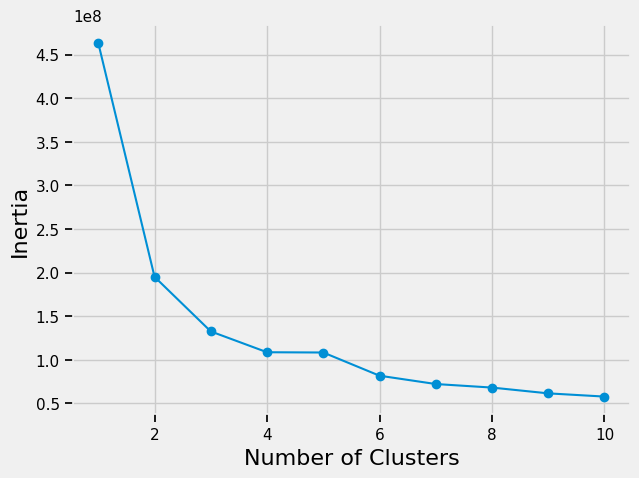
<!-- <br>
<img src="images/q2i.png" alt="drawing" width="400"/>
<br>  -->

In [ ]:
# Write your code here
...

From the elbow plot above, we select 4 clusters to visualize. First, let's fit a 4 cluster model.

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(bike_data_features_transformed)

Next, let's plot the cluster labels with `PC1` and `PC2`.

In [ ]:
total_trips = bike_data_features.sum(axis=1)
sns.scatterplot(x=bike_data_features_transformed['pc1'], 
                y=bike_data_features_transformed['pc2'], 
                hue=kmeans.labels_.astype(str), alpha=0.5)
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14);

From this plot, we can clearly see that `KMeans` is not the most appropriate method. There are a number of clustering algorithms out there, but for nicely-defined oval-shaped blobs like we see above, Gaussian Mixture Models are a very good choice. An important lesson here is that you will likely need to experiment with different clustering methods.

## Clustering Using Gaussian Mixture Models
Let's use `GaussianMixture` from `Scikit-Learn` with 4 clusters.

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4, covariance_type='tied', random_state=0)
gmm.fit(bike_data_features_transformed)

Next, let's plot the cluster labels with `PC1` and `PC2`.

In [ ]:
total_trips = bike_data_features.sum(axis=1)
sns.scatterplot(x=bike_data_features_transformed['pc1'], 
                y=bike_data_features_transformed['pc2'], 
                hue=gmm.predict(bike_data_features_transformed).astype(str), alpha=0.5);

Let's join these inferred cluster labels to the initial dataset.

In [ ]:
bike_data_features['cluster'] = gmm.predict(bike_data_features_transformed)
bike_data_new = bike_data.join(bike_data_features['cluster'], on=bike_data.index.date)
bike_data_new.head()

Now we can find the average trend by cluster and time using a `groupby` within this updated dataset.

In [ ]:
by_hour = bike_data_new.groupby(['cluster', bike_data_new.index.time])[['total', 'east', 'west']].mean()
by_hour.head()

Finally, we can plot the average hourly trend among the days within each cluster.

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
hourly_ticks = 4 * 60 * 60 * np.arange(6)

for i in range(4):
    by_hour.loc[i].plot(ax=ax[i], xticks=hourly_ticks)
    ax[i].set_title('Cluster {0}'.format(i), fontsize=16)
    ax[i].set_xlabel('Time', fontsize=14)
    ax[i].set_ylabel('Average Hourly Trips', fontsize=14)
    ax[i].tick_params(axis='x', labelrotation=45)

These plots give us some insight into the interpretation of the four clusters. Clusters 1 and 3 show a sharp bimodal traffic pattern with higher Eastward traffic in the morning and higher Westward traffic in the evening. For this reason, let's merge cluster 1 and 3 and replot.

In [ ]:
bike_data_new[bike_data_new['cluster'] == 3] = 1
bike_data_new.head()

In [ ]:
by_hour = bike_data_new.groupby(['cluster', bike_data_new.index.time])[['total', 'east', 'west']].mean()
by_hour.head()

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
hourly_ticks = 4 * 60 * 60 * np.arange(6)

for i in range(3):
    by_hour.loc[i].plot(ax=ax[i], xticks=hourly_ticks)
    ax[i].set_title('Cluster {0}'.format(i), fontsize=16)
    ax[i].set_xlabel('Time', fontsize=14)
    ax[i].set_ylabel('Average Hourly Trips', fontsize=14)
    ax[i].tick_params(axis='x', labelrotation=45)

## Question 2j
From simple unsupervised dimensionality reduction and clustering, we've discovered three distinct classes of days in the data. Use whatever visualization, tables, etc. you want to explain these three classes of days. Use the datetime index to provide context.  

*Type your answer here, replacing this text.*

## GitHub Classroom Submission

Please paste below your GitHub classroom online repository link (will be in the format `https://github.com/CME538-Assignment-Submission/cme538-assignment-9-your_username`)

**Congratulations, you're done Assignment 9. Review your answers and clean up that code before submitting on Quercus. `#cleancode`**